<a href="https://colab.research.google.com/github/abhinavgairola/Anomaly_Detection_OTC_Market/blob/main/Read_parquet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.7/dist-packages (4.14.3)


In [42]:
!pip install mplfinance

In [43]:
import pandas_datareader as pdr
import pandas as pd
import datetime
import matplotlib.pyplot as mp
import string
mp.style.use('ggplot')
import requests
import numpy as np
from bs4 import BeautifulSoup
import re
import json
from google.colab import drive
drive.mount('/content/drive')
import csv
import pyarrow as pa
import json
from sklearn import preprocessing
import calendar
from termcolor import colored
import seaborn as sns
import plotly.express as px
import mplfinance as mpf
import matplotlib.font_manager
mp.style.use('dark_background')
mp.rcParams["font.family"] = "Times New Roman"
cm = sns.light_palette("green", as_cmap=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
dir(mpf)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_arg_validators',
 '_helpers',
 '_mpf_warnings',
 '_mplwraps',
 '_panels',
 '_styledata',
 '_styles',
 '_utils',
 '_version',
 '_widths',
 'available_styles',
 'figure',
 'make_addplot',
 'make_marketcolors',
 'make_mpf_style',
 'mplfinance',
 'plot',
 'plotting',
 'show',
 'write_style_file']

In [45]:
help(mpf.make_addplot)

Help on function make_addplot in module mplfinance.plotting:

make_addplot(data, **kwargs)
    Take data (pd.Series, pd.DataFrame, np.ndarray of floats, list of floats), and
    kwargs (see valid_addplot_kwargs_table) and construct a correctly structured dict
    to be passed into plot() using kwarg `addplot`.  
    NOTE WELL: len(data) here must match the len(data) passed into plot()



In [46]:
help(mpf.make_marketcolors)

Help on function make_marketcolors in module mplfinance._styles:

make_marketcolors(**kwargs)
    Create a 'marketcolors' dict that is structured as expected
    by mplfinance._styles code:
        up     = color for close >= open
        down   = color for close  < open
        edge   = color for edge of candlestick; if "inherit"
                 then edge color will be same as up or down.
        wick   = color for wick of candlestick; if "inherit"
                 then wick color will be same as up or down.
        alpha  = opacity, 0.0 to 1.0, of candlestick face.
        ohlc   = color of ohlc bars when all the same color;
                 if ohlc == "inherit" then use up/down colors.
        volume = color of volume bars when all the same color;
                 if volume == "inherit" then use up/down colors.



##Read the stocks data from the Parquet file

In [47]:
df_stocks = pd.read_parquet('/content/drive/MyDrive/OTCMKT/Stocks_data_3.parquet.gzip')


In [48]:
### Compute daily average using open, close, high, low and adjusted close price.
df_daily_average=(df_stocks['Open']+df_stocks['Close']+df_stocks['High']+df_stocks['Low'])/4

In [49]:
### Filter the columns where tghe NaN is less than 50%
df_daily_average = df_daily_average[df_daily_average.columns[df_daily_average.isnull().mean()<=0.5]].fillna(0)

In [50]:
df_daily_average.index.date

array([datetime.date(2016, 1, 4), datetime.date(2016, 1, 5),
       datetime.date(2016, 1, 6), ..., datetime.date(2021, 4, 9),
       datetime.date(2021, 4, 12), datetime.date(2021, 4, 13)],
      dtype=object)

## Read the tweet data from the json file and bring it to shape

In [51]:
#with open('/content/drive/MyDrive/OTCMKT/All_tweets_with_emojis_with_punctuations.json','r') as f:
#  data = (json.load(f))

   

In [52]:
#test = pd.DataFrame.from_dict(data, orient='index')

In [53]:

#test

In [54]:
#test = test.T

In [55]:
#columns = test.columns.str.startswith('Date')
#columns_2 = test.columns.str.startswith('Tweets')
#columns = test.columns[columns]
#test.melt(id_vars=list(columns),value_vars=list(test.columns[columns_2]))

In [56]:
#df = pd.DataFrame.from_dict(data, orient='index')
#print(df)
## This I am doing it to bring it to proper shape.
#Dates = []
#Tweets = []
#Ticker  = []
#for key, vals in data.items():
#  if key.find('Date')>-1:
#    Dates = Dates+vals
#  elif key.find('Tweets')>-1:
#    Tweets = Tweets+vals
#    Ticker = Ticker + [key.split('Tweets')[1]]*len(vals)
#df_tweets = pd.DataFrame({'Dates':Dates,'Tweets':Tweets,'Ticker':Ticker})

In [57]:
## Convert dates column to datetime index
#df_tweets['Dates'] = pd.to_datetime(df_tweets['Dates'])
#df_tweets.set_index('Dates')[['Ticker','Tweets']].to_parquet('/content/drive/MyDrive/OTCMKT/All_tweets_correct_format.parquet.gzip',
#              compression='gzip')
df_tweets = pd.read_parquet('/content/drive/MyDrive/OTCMKT/All_tweets_correct_format.parquet.gzip')

In [58]:
df_tweets = df_tweets.reset_index()#.set_index('Dates')[['Ticker','Tweets']]
df_tweets.rename(columns={'Dates':'Date'},inplace=True)

In [59]:
Available_ticks = list(df_daily_average.columns)
Available_ticks

['RGBP',
 'HCMC',
 'DRNK',
 'FTEG',
 'INCT',
 'BDGR',
 'WWIO',
 'NUUU',
 'AZFL',
 'CBYI',
 'PHIL',
 'GDET',
 'GNCP',
 'ECEZ',
 'HAON',
 'FTXP',
 'MMEX',
 'IRNC',
 'GTEH',
 'INND',
 'ONCI',
 'KYNC',
 'LTNC',
 'INCC',
 'SVTE',
 'IMTL',
 'PLPL',
 'EFIR',
 'MLHC',
 'ABVG',
 'CBDL',
 'TBEV',
 'MDCN',
 'VIBI',
 'GRLT',
 'GTLL',
 'UVSE',
 'AMLH',
 'FOYJ',
 'FERN',
 'SIML',
 'TMGI',
 'GGII',
 'BEHL',
 'USEI',
 'SANP',
 'BLSP',
 'TGRO',
 'BOTY',
 'SUTI',
 'WNBD',
 'AITX',
 'MRNJ',
 'PRPM',
 'FCGD',
 'ILST',
 'AHFD',
 'ETFM',
 'PRMO',
 'TGGI',
 'IGEX',
 'ECOS',
 'ADGO',
 'SPQS',
 'PLYZ',
 'FBCD',
 'ADTM',
 'SNRS',
 'NWGC',
 'ENTI',
 'TWOH',
 'PBHG',
 'APPZ',
 'KGET',
 'MINE',
 'UBQU',
 'MTVX',
 'SEEK',
 'SDVI',
 'TPAC',
 'RCHA',
 'ICNM',
 'PYCT',
 'RMRK',
 'APYP',
 'VPER',
 'COWI',
 'BBRW',
 'ICBU',
 'HQGE',
 'BUNM',
 'MSPC',
 'PDMI',
 'HPIL',
 'AAGC',
 'HBRM',
 'USMJ',
 'IHSI',
 'HPNN',
 'WDLF',
 'AFOM',
 'ETEK',
 'HVCW',
 'DSCR',
 'BSSP',
 'PVSP',
 'MAXD',
 'MDIN',
 'PVDG',
 'BLUU',
 'RMTD',
 

In [60]:
df_tweets=df_tweets[df_tweets.Ticker.isin(Available_ticks)]

In [61]:
bar_plot_data = pd.DataFrame(df_tweets.set_index('Date').groupby('Ticker')['Tweets'].count()).reset_index().sort_values(by='Tweets',ascending=True).rename(columns={'Tweets':'Counts'})

In [62]:
list(bar_plot_data.tail(20).Ticker.values)

['OZSC',
 'WDLF',
 'SPOM',
 'AZFL',
 'NWBO',
 'SFOR',
 'MJNA',
 'SBES',
 'TTCM',
 'HMNY',
 'ANDI',
 'TRTC',
 'LTNC',
 'FNMA',
 'HCMC',
 'GBTC',
 'MINE',
 'DIRV',
 'ENZC',
 'OPTI']

In [63]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

In [64]:
TICKER_to_plot = 'OPTI'
Candle_stick=pd.DataFrame(index=df_stocks[('Adj Close')][TICKER_to_plot].index,data={'Open':df_stocks[('Open')][TICKER_to_plot].values,'Close':df_stocks[('Close')][TICKER_to_plot].values,'High':df_stocks[('High')][TICKER_to_plot].values,'Low':df_stocks[('Low')][TICKER_to_plot].values,'Volume':df_stocks[('Volume')][TICKER_to_plot].values})

In [65]:
period = 20 
multiplier = 2
Candle_stick['UpperBand'] = Candle_stick['Close'].rolling(period).mean() + Candle_stick['Close'].rolling(period).std() * multiplier
Candle_stick['LowerBand'] = Candle_stick['Close'].rolling(period).mean() - Candle_stick['Close'].rolling(period).std() * multiplier

In [66]:
Candle_stick

,Open,Close,High,Low,Volume,UpperBand,LowerBand
Date,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-04-07,0.1550,0.1360,0.1600,0.13520,11971581.0,0.177288,0.100991
2021-04-08,0.1350,0.1310,0.1450,0.12197,16413581.0,0.176596,0.100223
2021-04-09,0.1315,0.1290,0.1340,0.11850,11508660.0,0.173843,0.099870


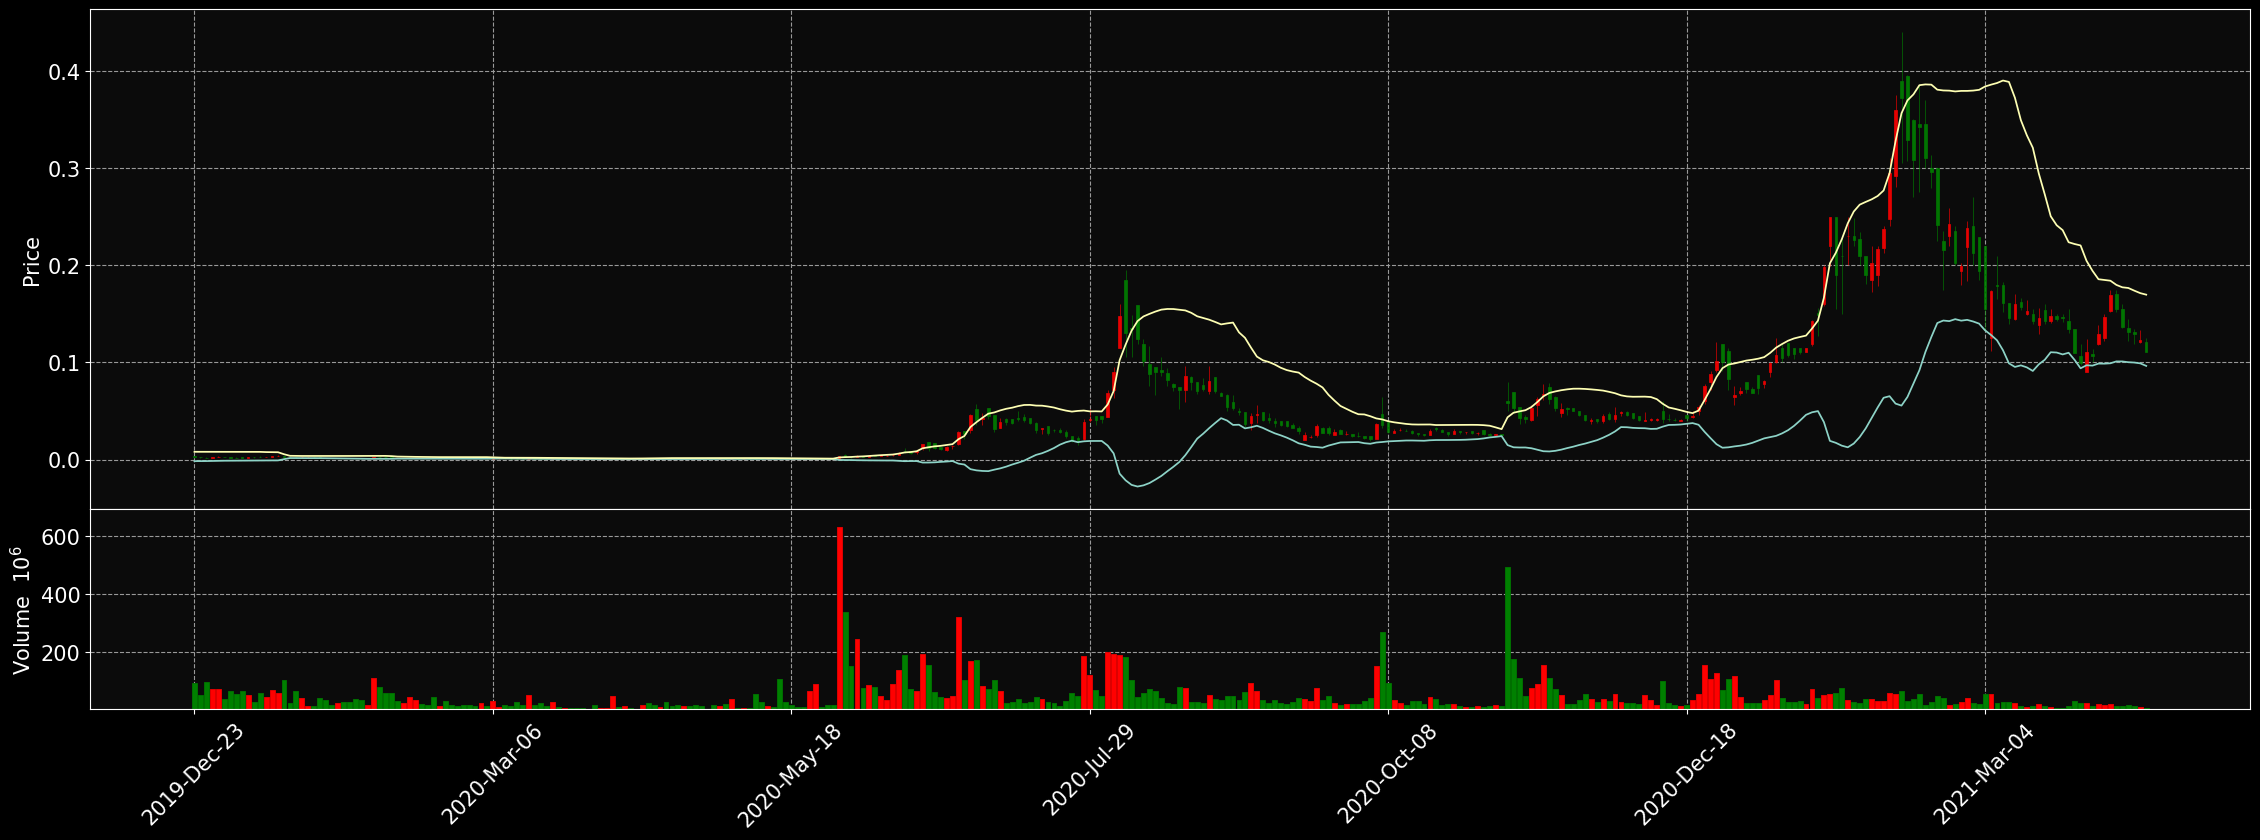

In [67]:
tcdf = Candle_stick[['LowerBand','UpperBand']]  
apd  = mpf.make_addplot(tcdf.iloc[1000:1400,:])
mc = mpf.make_marketcolors(up='#FF0000',down='#008000',inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='nightclouds',marketcolors=mc)
mpf.plot(Candle_stick.iloc[1000:1400,:], type='candle',figsize=(30,10),addplot=apd,volume=True,fontscale=1.5,style=s)


##[Candle stick]((https://en.wikipedia.org/wiki/Candlestick_chart)) chart showing the [Bollinger bands](https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/bollinger-bands#:~:text=Bollinger%20Bands%20are%20envelopes%20plotted,Period%20and%20Standard%20Deviations%2C%20StdDev.) together with the Open, Close, High and Low at each day and the volume of the traded stock (ticker name:UBQU). More can be learned from [here](https://finance.yahoo.com/news/read-candle-chart-190000711.html). Some interesting patterns like [bullish engulfing](https://www.dailyfx.com/education/candlestick-patterns/bullish-engulfing.html) can be checked from here too.

In [68]:
bar_plot_2 = pd.DataFrame(df_tweets.groupby(['Date','Ticker'])['Tweets'].count())
#bar_plot_2[bar_plot_2.Ticker=='ABQQ']
pd.DataFrame(df_tweets.set_index('Date').groupby('Ticker')['Tweets'].count()).reset_index().sort_values(by='Tweets',ascending=True).rename(columns={'Tweets':'Counts'})

,Ticker,Counts
886,WWNG,8
734,SNYL,10
883,WTRO,11
336,GPKE,13
84,BFLD,16
...,...,...
306,GBTC,95739
509,MINE,97953
195,DIRV,102652
249,ENZC,112244


In [69]:
#df_tweets[df_tweets.Ticker =='UBQU']
bar_plot_2 = bar_plot_2.reset_index()
UBQU = bar_plot_2[bar_plot_2.sort_values(by='Ticker',ascending=False).Ticker == 'UBQU']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [70]:
UBQU['Date'].filter(items=list(UBQU.Date.values[0:10]))

Series([], Name: Date, dtype: datetime64[ns])

In [71]:
UBQU=UBQU.rename(columns={'Tweets':'Counts'})

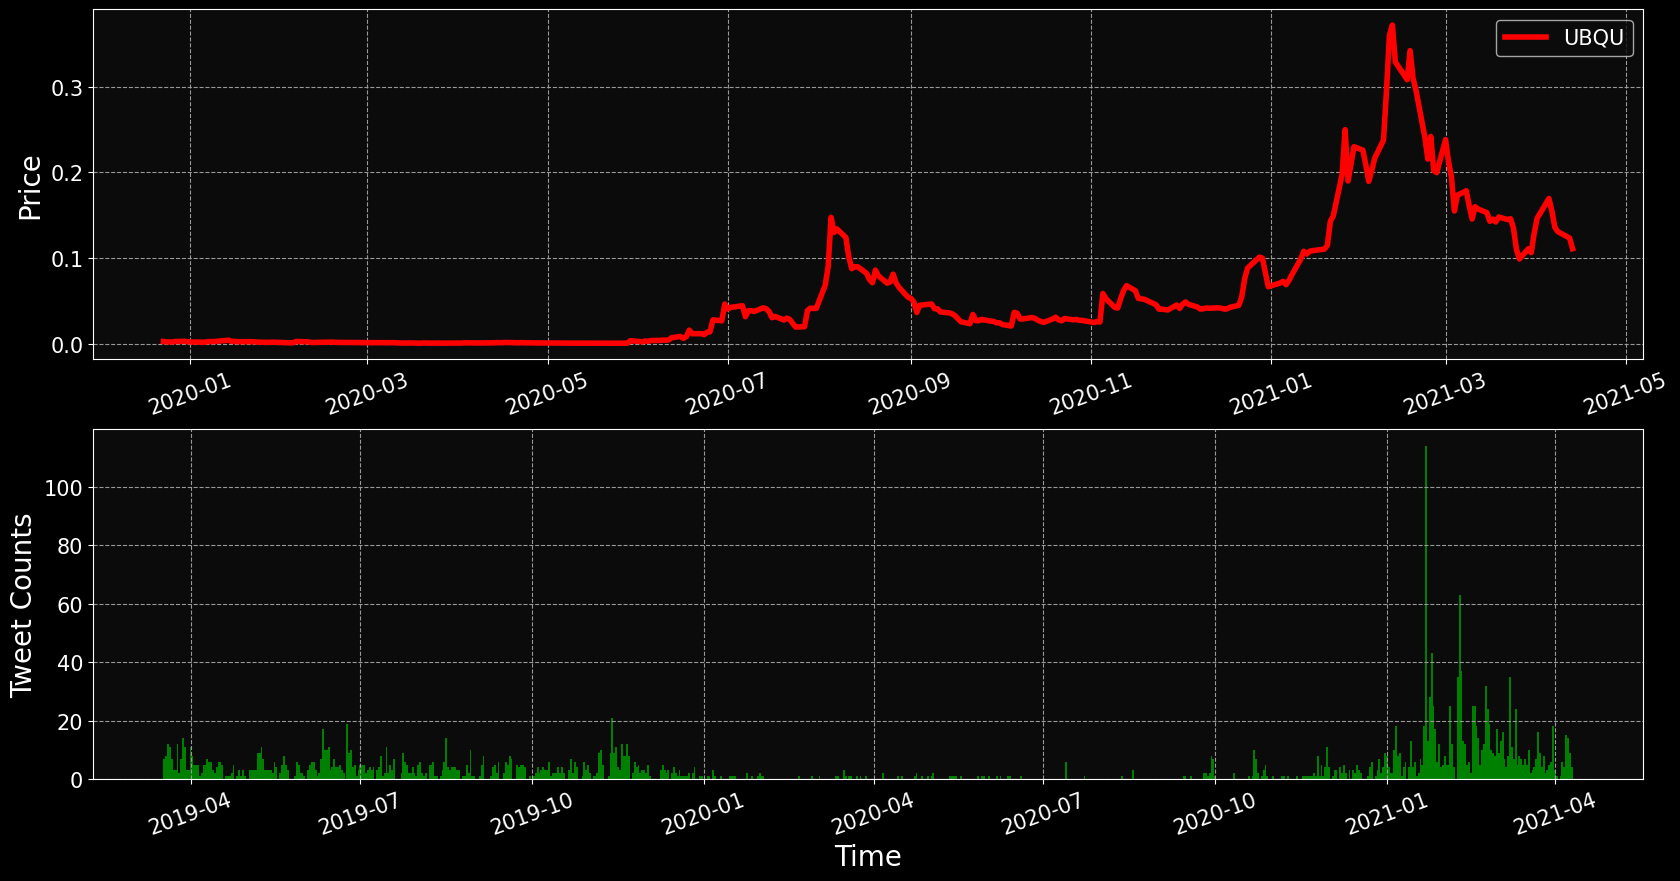

In [72]:

x =UBQU['Date']
y= UBQU['Counts']
fig, ax = mp.subplots(2,1,figsize=(20,10))
ax[0].plot(Candle_stick.index[1000:2400], Candle_stick['Close'][1000:2400],color='red',linewidth=4,label='UBQU')
mp.setp(ax[1].get_xticklabels(), rotation=20)
mp.setp(ax[0].get_xticklabels(), rotation=20)
ax[1].bar(x[1000:2400],y[1000:2400],color='green',width=1.0)
ax[1].set_xlabel('Time',fontsize=20)
ax[1].set_ylabel('Tweet Counts',fontsize=20)
ax[0].set_ylabel('Price',fontsize=20)
ax[0].legend(loc='best')

In [73]:
help(mpf.plot)

Help on function plot in module mplfinance.plotting:

plot(data, **kwargs)
    Given a Pandas DataFrame containing columns Open,High,Low,Close and optionally Volume
    with a DatetimeIndex, plot the data.
    Available plots include ohlc bars, candlestick, and line plots.
    Also provide visually analysis in the form of common technical studies, such as:
    moving averages, renko, etc.
    Also provide ability to plot trading signals, and/or addtional user-defined data.



In [74]:
bar_plot_2 = bar_plot_2.sort_values(by='Tweets').tail(1000)

In [75]:
bar_plot_2

,Date,Ticker,Tweets
88428,2017-04-03,MMEX,546
21791,2016-04-17,HVCW,546
68153,2016-12-27,UBQU,546
538188,2021-02-03,FTEG,547
446138,2020-07-13,OPTI,547
...,...,...,...
537533,2021-02-02,HCMC,3691
20672,2016-04-12,ECEZ,3746
541583,2021-02-08,HCMC,4684
551938,2021-02-23,ANDI,5301


In [76]:
fig = px.treemap(bar_plot_2, path=['Ticker', 'Date'], values='Tweets',color='Ticker',color_continuous_scale=px.colors.sequential.RdBu)
fig.update_layout(font=dict(family="Times New Roman",
        size=18,
        color="white"),plot_bgcolor='rgba(0,0,0,1)',paper_bgcolor= 'rgba(0, 0, 0, 1)')
fig.show()


## The above plots represents the heirarchical information about the tickers--there tickers inside which the dates are listed while the tweet counts represent the size of each date box. Clearly HCMC and ENZC are tweeted many times across multiple dates. It might happen later that these are the most severly pumped OTC market stocks.

In [77]:
fig_1 = px.bar(bar_plot_data.tail(50), x='Counts', y='Ticker',orientation='h',labels=dict(x="Counts", y="Keywords"),color='Counts',color_continuous_scale=px.colors.sequential.Reds)
fig_1.update_layout(font=dict(family="Times New Roman",size=18,color="white"),plot_bgcolor='rgba(0,0,0,1)',paper_bgcolor= 'rgba(0, 0, 0, 1)')
fig_1.show()

## Tweets and their counts are shown in the above plot

In [78]:
columns_list_of_stocks = list(bar_plot_data.tail(200).Ticker.values)#df_daily_average.columns)


In [79]:
## loc doesn't support list with missing values anymore using filter method.
#df_daily_average['XTRM'].filter(items=time_list_unique).plot(figsize=(20,10))
#columns_list_of_stocks = sorted(columns_list_of_stocks)[::-1]

In [80]:

df_daily_average_copy = df_daily_average.copy()


def mean_std(Ticker_name,dataframe):

  """
  The utility of this method is 
  1) Select those days where the tweet counts is > 100.
  2) Compute the 20 days backward average as mentioned in this work:-https://qspace.library.queensu.ca/bitstream/handle/1974/28239/David_Nam_K_202010_MSC.pdf?sequence=2&isAllowed=y
  3) Compute the standard deviation too on the same time scale
  """

  time_delta = datetime.timedelta(1)

  df_daily_average_copy = dataframe.copy()
  
  ## select those days where the tweet counts is > 100
  time_list = list(df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count()[df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count().apply(lambda x: x>=100)].index)#list((df_tweets[df_tweets['Ticker'] == Ticker_name]['Dates']))
  
  #print(df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count()[df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count().apply(lambda x: x>=100)])
  time_list_unique=(time_list)#list(pd.to_datetime((df_tweets[df_tweets['Ticker'] == Ticker_name]['Dates'].unique())))

  #print(time_list_unique)
  date = []
  Data_mean = []
  Data_std = []
  
  for time in time_list_unique[::-1]:

    filtering = [time-i*time_delta for i in range(1,20) if calendar.day_name[(time-i*time_delta).weekday()] in ['Monday','Tuesday','Wednesday','Thursday','Friday'] ]
    date.append(time)
    Data_mean.append(df_daily_average_copy[Ticker_name].filter(items=filtering).dropna().mean())
    Data_std.append(df_daily_average_copy[Ticker_name].filter(items=filtering).dropna().std())

  return pd.DataFrame({'Date':date,'Mean_'+Ticker_name:Data_mean,'Std_'+Ticker_name:Data_std}).set_index('Date')


## Loop through the tickers and merge the above computation to the copy of the stock dataframe.
for idx,tick in enumerate(columns_list_of_stocks[0:200]):
  print(colored(idx,'red'),colored(tick,'green') )
  intermediate = mean_std(tick,df_daily_average)
  #print(test)

  df_daily_average_copy = pd.concat([df_daily_average_copy,intermediate],axis=1)#df_daily_average_copy.combine_first(test)
  #test_4 = pd.concat([df_daily_average,test_3],axis=1).rename(columns={0:'Indicator_XTRM'})
  #test_4 =pd.concat([test_4,test_5],axis=1).rename(columns={'Tweets':'Tweets_XTRM'})

#df_daily_average=df_daily_average.combine_first(pd.DataFrame({'Date':date,'Ticker_mean':XTRM_mean,'Ticker_std':XTRM_std}).set_index('Date'))
#df_daily_average

0 HALB
1 JADA
2 DSCR
3 NBDR
4 BIEI
5 VIBI
6 FDBL
7 SHOM
8 DPLS
9 HENC
10 PTOP
11 LIGA
12 BTDG
13 GDET
14 HMPQ
15 GNCP
16 CAVR
17 PZOO
18 MSMY
19 RGGI
20 APYP
21 DEWM
22 KSHB
23 LFAP
24 KYNC
25 KBLB
26 MFST
27 BFCH
28 HVCW
29 DCAC
30 CYIO
31 MSRT
32 HQGE
33 TWOH
34 RETC
35 IQST
36 ZHUD
37 ADOM
38 DGTW
39 ARSN
40 LLLI
41 TSOI
42 NGTF
43 ECEZ
44 CBDL
45 BRLL
46 JNSH
47 SHMN
48 HAON
49 RGBP
50 LCLP
51 RJDG
52 TBEV
53 BMIX
54 PAOG
55 GTEH
56 DBMM
57 DLCR
58 SNPW
59 GAHC
60 IGPK
61 KALY
62 MAXD
63 IPIX
64 AGTK
65 SBFM
66 GTII
67 AAGC
68 VSYM
69 INTV
70 NSPX
71 MYDX
72 DECN
73 SNMN
74 RMRK
75 ABCE
76 CCTL
77 PASO
78 MSPC
79 CGRA
80 XTRM
81 KOSK
82 RDGL
83 ICLD
84 RBNW
85 BIEL
86 VISM
87 BMXC
88 ADTM
89 MLHC
90 IFXY
91 APRU
92 TRNX
93 RSHN
94 TPAC
95 STHC
96 TVOG
97 MRNJ
98 RDAR
99 BLSP
100 DATI
101 NUGS
102 USRM
103 INKW
104 ALYI
105 RNWF
106 SIML
107 SGMD
108 DRNK
109 BTCS
110 RMHB
111 PHIL
112 AITX
113 TLSS
114 AMLH
115 VMNT
116 BTSC
117 ASTI
118 AFOM
119 GTCH
120 SIRC
121 KGKG
122 MEDH
123

In [81]:

Mean_data = df_daily_average_copy[df_daily_average_copy.columns[df_daily_average_copy.columns.str.startswith("Mean")]]


In [82]:
Std_data = df_daily_average_copy[df_daily_average_copy.columns[df_daily_average_copy.columns.str.startswith("Std")]]

In [83]:
Mean_data.isnull().mean()#.style.background_gradient(cmap=cm)

Mean_HALB    0.978584
Mean_JADA    0.978584
Mean_DSCR    0.985723
Mean_NBDR    0.995836
Mean_BIEI    0.992267
               ...   
Mean_GBTC    0.842356
Mean_MINE    0.857823
Mean_DIRV    0.851874
Mean_ENZC    0.880428
Mean_OPTI    0.814396
Length: 200, dtype: float64

In [84]:
Std_data

,Std_HALB,Std_JADA,Std_DSCR,Std_NBDR,Std_BIEI,Std_VIBI,Std_FDBL,Std_SHOM,Std_DPLS,Std_HENC,Std_PTOP,Std_LIGA,Std_BTDG,Std_GDET,Std_HMPQ,Std_GNCP,Std_CAVR,Std_PZOO,Std_MSMY,Std_RGGI,Std_APYP,Std_DEWM,Std_KSHB,Std_LFAP,Std_KYNC,Std_KBLB,Std_MFST,Std_BFCH,Std_HVCW,Std_DCAC,Std_CYIO,Std_MSRT,Std_HQGE,Std_TWOH,Std_RETC,Std_IQST,Std_ZHUD,Std_ADOM,Std_DGTW,Std_ARSN,...,Std_VYST,Std_MCOA,Std_AMMJ,Std_NECA,Std_SANP,Std_ERBB,Std_GTLL,Std_OTTV,Std_CYDY,Std_AABB,Std_TPTW,Std_ONCI,Std_MMEX,Std_INND,Std_GRNF,Std_HEMP,Std_HBRM,Std_GAXY,Std_OWCP,Std_CBBT,Std_OZSC,Std_WDLF,Std_SPOM,Std_AZFL,Std_NWBO,Std_SFOR,Std_MJNA,Std_SBES,Std_TTCM,Std_HMNY,Std_ANDI,Std_TRTC,Std_LTNC,Std_FNMA,Std_HCMC,Std_GBTC,Std_MINE,Std_DIRV,Std_ENZC,Std_OPTI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN,0.945755,NaN,21.465658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.132583,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035504,NaN,NaN,NaN,0.000738,NaN,0.000184,NaN,NaN,NaN,0.006970,NaN,NaN,NaN,NaN,0.001839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000911,NaN,0.001035,NaN,0.643906,0.065955,NaN,NaN,0.000255,0.004836,NaN,NaN,0.000261,NaN,NaN,0.010475,0.012626,0.001529,NaN,0.000653,0.072675,0.012908,NaN,NaN,0.001904,NaN,NaN,NaN,0.021249,0.093283,0.000131,2.656943,0.024925,NaN,0.039295,0.020854
2021-04-09,NaN,NaN,0.000937,NaN,NaN,NaN,NaN,NaN,0.002859,0.035230,NaN,NaN,NaN,NaN,NaN,0.000176,NaN,NaN,NaN,0.006842,NaN,NaN,NaN,NaN,0.002129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000903,NaN,0.001080,NaN,0.624143,0.063370,NaN,NaN,0.000245,0.007756,NaN,NaN,0.000270,NaN,NaN,0.011312,0.012826,0.001583,NaN,0.000879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020496,NaN,0.000133,NaN,0.024196,NaN,0.038479,0.019967
2021-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009939,NaN,NaN,0

In [85]:
df_tweets.rename(columns={'Dates':'Date'},inplace=True)

In [86]:
#(pd.DataFrame({'Date':date,'Ticker_mean':XTRM_mean}).set_index('Date')).plot(marker='o',figsize=(40,10))
#df_daily_average['Ticker_mean'].plot(marker='*',figsize=(40,10),color='green')
#df_daily_average['XTRM'].dropna().plot(figsize=(20,10))
final_df = df_daily_average.copy()
def helper_label(list_,df_):
  """
  1) Create indicator 0 (No pump) and 1 (pump) variables by comparing the average price of the day with the 2*backward looking standard deviation + backward looking mean for the selected days.
  2) Count the tweets for the ticker by grouping them with the date.
  3) Merge the two variables with the data frame.
  """
  for idx,tick in enumerate(list_):
    indicator = pd.DataFrame((df_daily_average_copy[tick] > 2*df_daily_average_copy['Std'+'_'+tick]+df_daily_average_copy['Mean_'+tick]).astype(int))
    #mp.figure(idx,figsize=(20,10))
    tweets = df_tweets[df_tweets['Ticker']==tick].groupby('Date')['Tweets'].count()
    normal_tweet  = ((tweets-tweets.min())/(tweets.max()-tweets.min()))
    #mp.plot(normal_tweet.index,normal_tweet.values,label="Tweet_"+tick)
    normal_data = ((df_daily_average_copy[tick]-df_daily_average_copy[tick].min())/(df_daily_average_copy[tick].max()-df_daily_average_copy[tick].min())).dropna()#.plot()
    #mp.plot(normal_data.index, normal_data.values,label='Stock_'+tick)
    #mp.plot(indicator.index,indicator.values,label='label'+'_'+tick)
    #mp.legend(loc='best')
    #print("This is indicator {}".format(indicator))
    df_ = pd.concat([df_,indicator],axis=1).rename(columns={0:'Indicator_'+tick})
    df_ = pd.concat([df_,tweets],axis=1).rename(columns={'Tweets':'Tweets_'+tick})

  return df_
temporary_step = helper_label(columns_list_of_stocks[0:200],final_df)
#temporary_step

In [87]:
temporary_step

,RGBP,HCMC,DRNK,FTEG,INCT,BDGR,WWIO,NUUU,AZFL,CBYI,PHIL,GDET,GNCP,ECEZ,HAON,FTXP,MMEX,IRNC,GTEH,INND,ONCI,KYNC,LTNC,INCC,SVTE,IMTL,PLPL,EFIR,MLHC,ABVG,CBDL,TBEV,MDCN,VIBI,GRLT,GTLL,UVSE,AMLH,FOYJ,FERN,...,Indicator_OZSC,Tweets_OZSC,Indicator_WDLF,Tweets_WDLF,Indicator_SPOM,Tweets_SPOM,Indicator_AZFL,Tweets_AZFL,Indicator_NWBO,Tweets_NWBO,Indicator_SFOR,Tweets_SFOR,Indicator_MJNA,Tweets_MJNA,Indicator_SBES,Tweets_SBES,Indicator_TTCM,Tweets_TTCM,Indicator_HMNY,Tweets_HMNY,Indicator_ANDI,Tweets_ANDI,Indicator_TRTC,Tweets_TRTC,Indicator_LTNC,Tweets_LTNC,Indicator_FNMA,Tweets_FNMA,Indicator_HCMC,Tweets_HCMC,Indicator_GBTC,Tweets_GBTC,Indicator_MINE,Tweets_MINE,Indicator_DIRV,Tweets_DIRV,Indicator_ENZC,Tweets_ENZC,Indicator_OPTI,Tweets_OPTI
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,30.0,NaN,NaN,NaN,29.0,NaN,NaN,NaN,9.0,NaN,1.0,NaN,NaN,NaN,58.0,NaN,48.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,11.0,NaN,4.0,NaN,NaN,NaN,NaN
2016-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,2.0,0.0,140.0,0.0,NaN,0.0,13.0,0.0,NaN,0.0,26.0,0.0,NaN,0.0,NaN,0.0,51.0,0.0,118.0,0.0,102.0,0.0,NaN,0.0,NaN,0.0,87.0,0.0,NaN,0.0,NaN,0.0,1.0
2016-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,13.0,0.0,160.0,0.0,NaN,0.0,9.0,0.0,NaN,0.0,54.0,0.0,NaN,0.0,NaN,0.0,13.0,0.0,92.0,0.0,97.0,0.0,NaN,0.0,4.0,0.0,112.0,0.0,6.0,0.0,NaN,0.0,NaN
2016-01-04,0.156525,853982.906250,0.000250,0.000100,15471.698242,0.000420,0.000100,0.018925,0.100000,0.000100,0.400000,1.000000,0.000100,623.000000,0.040000,0.000000,0.410000,0.310000,191.433567,0.000000,0.000100,400.000000,0.000775,0.000300,0.008800,0.015000,0.048650,0.001000,0.000250,0.000425,194.500000,0.025000,0.000100,0.000000,0.000175,0.000100,0.000100,0.001225,0.000010,0.001400,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,5.0,0.0,130.0,0.0,NaN,0.0,35.0,0.0,NaN,0.0,49.0,0.0,2.0,0.0,1.0,0.0,102.0,0.0,37.0,0.0,172.0,0.0,NaN,0.0,8.0,0.0,52.0,0.0,16.0,0.0,NaN,0.0,2.0
2016-01-05,0.151250,621587.562500,0.000300,0.000100,15688.679199,0.000420,0.000100,0.013450,0.100000,0.000100,0.498750,1.000000,0.000100,611.500000,0.040000,0.000000,0.410000,0.310000,173.076923,0.000000,0.000100,400.000000,0.000838,0.000300,0.008800,0.015000,0.052175,0.001000,0.000200,0.000400,225.000000,0.025000,0.000100,0.000000,0.000175,0.000100,0.000100,0.001225,0.000010,0.001500,...,0.0,NaN,0.0,NaN,0.0,NaN,0.0,11.0,0.0,48.0,0.0,NaN,0.0,26.0,0.0,NaN,0.0,15.0,0.0,NaN,0.0,NaN,0.0,112.0,0.0,121.0,0.0,20.0,0.0,NaN,0.0,2.0,0.0,20.0,0.0,8.0,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-09,0.023013,0.001025,0.005525,0.002900,0.001925,0.000975,0.000550,0.001013,0.007300,0.003038,0.002663,0.002250,0.001625,0.001025,0.000500,0.006500,0.001800,0.000625,0.001825,0.050600,0.001500,0.006813,0.065363,0.004525,0.000450,0.009275,0.001363,0.001175,0.000925,0.000675,0.001475,0.001050,0.000913,0.001675,0.002638,0.004225,0.000500,0.002350,0.000550,0.003800,...,0.0,167.0,0.0,600.0,0.0,3.0,0.0,563.0,0.0,91.0,0.0,83.0,0.0,13.0,0.0,60.0,0.0,72.0,0.0,1.0,0.0,46.0,0.0,10.0,0.0,1816.0,0.0,89.0,0.0,347.0,0.0,93.0,0.0,113.0,0.0,2.0,0.0,732.0,0.0,348.0
2021-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [88]:

#pd.concat([t[['Tweets_RGBP','Indicator_RGBP','XTRM']].melt(id_vars='Tweets_RGBP',value_vars=['Indicator_RGBP']),pd.DataFrame(t[['Tweets_RGBP','Indicator_RGBP','XTRM']].index)],axis=1)
#t.columns[list(t.columns.str.startswith('Tweet'))

def cleaning_up(columns_list_of_stocks, idx,df_):
  """
  Create a clean melted dataframe with id variables Tweets_tickers and value variables as Indicator
  """

  df_clean = pd.DataFrame()
  #indexes = []

  for tick in columns_list_of_stocks[0:idx]:
    temp = pd.concat([df_[['Tweets_'+tick,'Indicator_'+tick,tick]].melt(id_vars='Tweets_'+tick,value_vars=['Indicator_'+tick]),pd.DataFrame(df_[['Tweets_'+tick,'Indicator_'+tick,tick]].index)],axis=1)
    #temp = pd.concat([temp,pd.DataFrame(df_[tick].values)],axis=1)
    temp.rename(columns={'Tweets_'+tick:'Tweet_counts'},inplace=True)
    df_clean = pd.concat([df_clean,temp],axis=0)
    #df_clean = pd.concat([df_clean,(df_[tick])],axis=1)
    #print(list(df_[tick].index))
    #indexes = indexes+list(df_[tick].index)
  print(df_clean)
  return df_clean.rename(columns={0:'Price'})#,indexes

all_clean = cleaning_up(columns_list_of_stocks,200,temporary_step)
all_clean.rename(columns={'value':'Indicator'},inplace=True)
## Keep the indicators where only more than 100 tweets are there as it was the case above.
all_clean = all_clean[all_clean['Tweet_counts']>=100]
all_clean['variable'] = all_clean['variable'].apply(lambda x: x.split('_')[1])
all_clean

      Tweet_counts        variable  value       Date
0              NaN  Indicator_HALB    NaN 2016-01-01
1              NaN  Indicator_HALB    0.0 2016-01-02
2              NaN  Indicator_HALB    0.0 2016-01-03
3              NaN  Indicator_HALB    0.0 2016-01-04
4              1.0  Indicator_HALB    0.0 2016-01-05
...            ...             ...    ...        ...
1925         348.0  Indicator_OPTI    0.0 2021-04-09
1926          83.0  Indicator_OPTI    0.0 2021-04-10
1927           NaN  Indicator_OPTI    NaN 2021-04-11
1928           NaN  Indicator_OPTI    0.0 2021-04-12
1929           NaN  Indicator_OPTI    0.0 2021-04-13

[386000 rows x 4 columns]


,Tweet_counts,variable,Indicator,Date
1551,117.0,HALB,1.0,2020-03-31
1553,129.0,HALB,1.0,2020-04-02
1554,103.0,HALB,0.0,2020-04-03
1557,188.0,HALB,1.0,2020-04-06
1559,106.0,HALB,0.0,2020-04-08
...,...,...,...,...
1921,375.0,OPTI,0.0,2021-04-05
1922,309.0,OPTI,0.0,2021-04-06
1923,334.0,OPTI,0.0,2021-04-07
1924,510.0,OPTI,0.0,2021-04-08


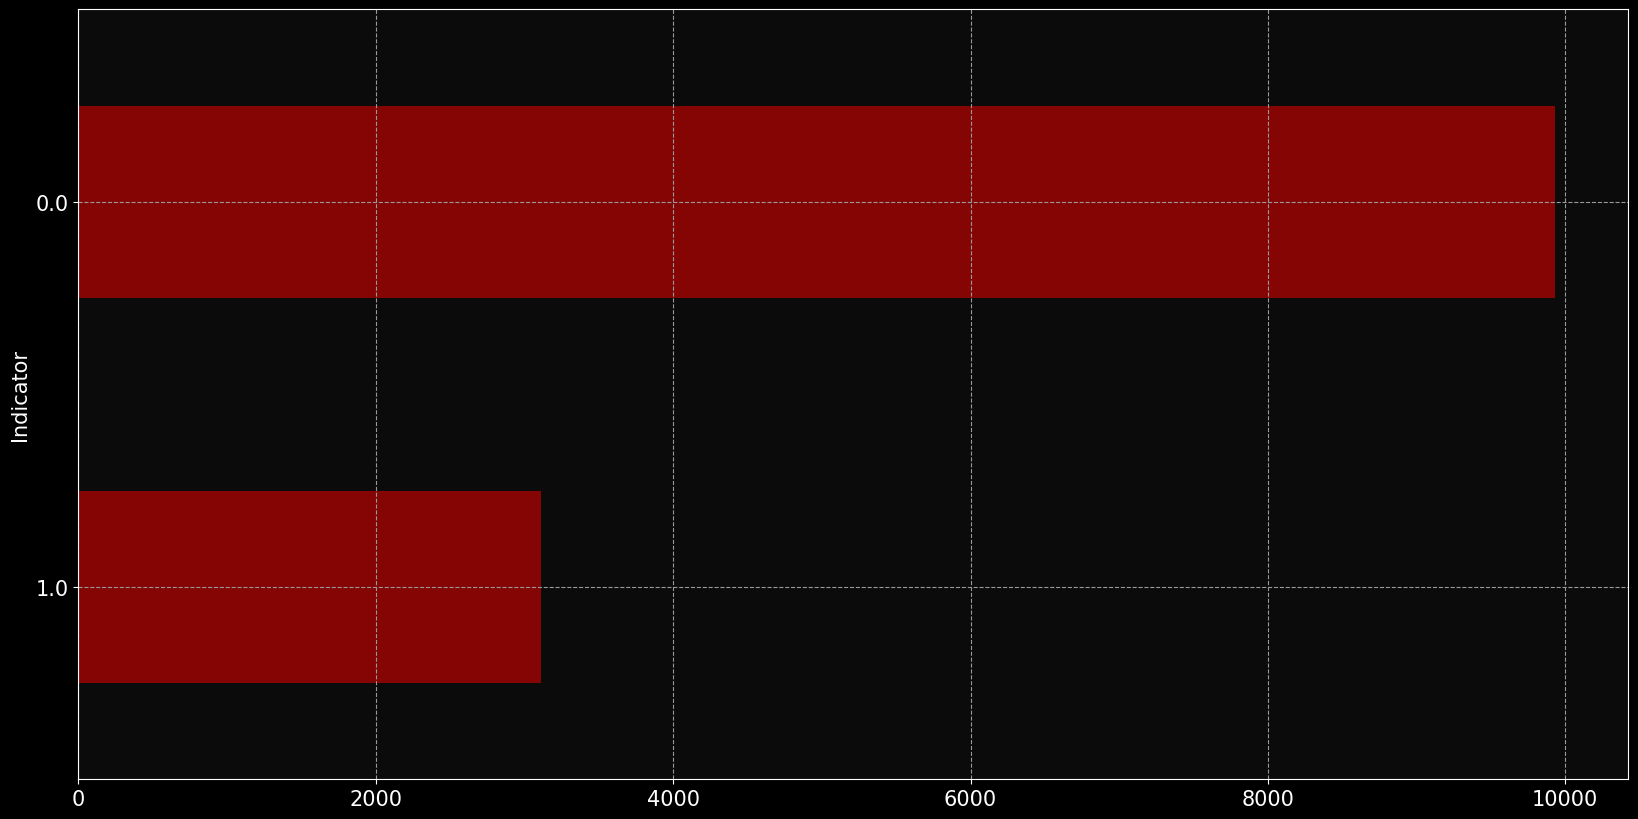

In [89]:
all_clean[['Indicator']].groupby('Indicator')['Indicator'].count().sort_values().plot(kind='barh',figsize=(20,10),color='red',alpha=0.5)

In [90]:
!pip install vaderSentiment

In [91]:
(df_tweets[df_tweets['Ticker'] == 'RGBP'].groupby('Date')['Tweets'].count()[df_tweets[df_tweets['Ticker'] == 'RGBP'].groupby('Date')['Tweets'].count().apply(lambda x: x>=100)])

Date
2016-02-20     124
2016-09-16     168
2016-09-20     489
2016-09-21     184
2016-09-22     211
2016-09-29     173
2016-09-30     183
2017-03-02     176
2017-03-23     134
2019-05-08     105
2020-12-02     124
2020-12-03     120
2021-03-25     199
2021-04-08    2876
2021-04-09    2502
2021-04-10     947
Name: Tweets, dtype: int64

In [92]:
 from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
 from collections import Counter
 analyzer = SentimentIntensityAnalyzer()

In [93]:
#len(columns_list_of_stocks[0:stocks_to_track])

In [94]:
Tweets = []
Ticker = []
Sentiment = []
Price = []
Dates = []
for Ticker_name in columns_list_of_stocks[0:200]:
  print(Ticker_name)
  g = df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')
  #print((g.groups.keys()))
  idx = (df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count()[df_tweets[df_tweets['Ticker'] == Ticker_name].groupby('Date')['Tweets'].count().apply(lambda x: x>=100)].index)

  #print(g.groups.keys())#[pd.to_datetime(idx[0])])
  #print(g.groups[idx[0]])
  #groups = [unused_df for name,unused_df in g]

  for i,j in g:
    sentiment = []
    if i in idx:
      Dates.append(i)
      #print(i)
      for tweet in (j.iloc[:,2].values):
        #print(tweet)
        vs = analyzer.polarity_scores(tweet)
        Tweets.append(tweet)
        #sentiment.append(vs['compound'])
        if(vs['compound'])>=0.05:
          sentiment.append(1)
        elif (vs['compound'])>-0.05 and (vs['compound'])<0.05:
          sentiment.append(0)
        elif (vs['compound'])<=-0.05:
          sentiment.append(-1)
      counts = Counter(sentiment)
      #print(sentiment)
      #if counts.keys() in [0,1]
      #print(counts[-1],counts)
      net = (counts[1]-counts[-1])/(counts[1]+counts[0]+counts[-1])
      #print(net)
      Sentiment.append(net)
      Ticker.append(Ticker_name)
  #print("This is date",len(Dates))
  #print("This is sentiment",len(Sentiment))
  #ttt
      #ttt
  #Price.append(df_daily_average[[Ticker_name]].filter(items=Dates).values)
      
        
      


  
print(Sentiment)      


HALB
JADA
DSCR
NBDR
BIEI
VIBI
FDBL
SHOM
DPLS
HENC
PTOP
LIGA
BTDG
GDET
HMPQ
GNCP
CAVR
PZOO
MSMY
RGGI
APYP
DEWM
KSHB
LFAP
KYNC
KBLB
MFST
BFCH
HVCW
DCAC
CYIO
MSRT
HQGE
TWOH
RETC
IQST
ZHUD
ADOM
DGTW
ARSN
LLLI
TSOI
NGTF
ECEZ
CBDL
BRLL
JNSH
SHMN
HAON
RGBP
LCLP
RJDG
TBEV
BMIX
PAOG
GTEH
DBMM
DLCR
SNPW
GAHC
IGPK
KALY
MAXD
IPIX
AGTK
SBFM
GTII
AAGC
VSYM
INTV
NSPX
MYDX
DECN
SNMN
RMRK
ABCE
CCTL
PASO
MSPC
CGRA
XTRM
KOSK
RDGL
ICLD
RBNW
BIEL
VISM
BMXC
ADTM
MLHC
IFXY
APRU
TRNX
RSHN
TPAC
STHC
TVOG
MRNJ
RDAR
BLSP
DATI
NUGS
USRM
INKW
ALYI
RNWF
SIML
SGMD
DRNK
BTCS
RMHB
PHIL
AITX
TLSS
AMLH
VMNT
BTSC
ASTI
AFOM
GTCH
SIRC
KGKG
MEDH
CMGO
LEAS
ACRL
ETFM
SPHS
POTN
MGTI
TGGI
HPNN
IVST
RNVA
PCTL
ATVK
RXMD
USMJ
INQD
ILUS
EPAZ
ATWT
FMCC
GRCU
SIPC
IMTL
PURA
AXXA
GRNH
VPER
CBDD
UBQU
FTEG
IDVV
VAPE
SRMX
NSAV
SEGI
MJTK
PVDG
VYST
MCOA
AMMJ
NECA
SANP
ERBB
GTLL
OTTV
CYDY
AABB
TPTW
ONCI
MMEX
INND
GRNF
HEMP
HBRM
GAXY
OWCP
CBBT
OZSC
WDLF
SPOM
AZFL
NWBO
SFOR
MJNA
SBES
TTCM
HMNY
ANDI
TRTC
LTNC
FNMA
HCMC
GBTC
MINE
DIRV
ENZC
OPTI


In [95]:
Sentiment_df = pd.DataFrame({'Ticker_name':Ticker,'Sentiment_Score':Sentiment,'Dates':Dates})
print(len(Dates))
#len(Tweets)
#len(Sentiment)
(Sentiment_df[Sentiment_df['Ticker_name']=='RGBP'])
#mp.plot(Sentiment_df['Date'],Sentiment_df['Sentiment_Score'],'o')
#print(len(Price),len(Ticker))
len(Sentiment_df.Ticker_name.unique())
Sentiment_df

13036


,Ticker_name,Sentiment_Score,Dates
0,HALB,0.273504,2020-03-31
1,HALB,0.364341,2020-04-02
2,HALB,0.368932,2020-04-03
3,HALB,0.372340,2020-04-06
4,HALB,0.386792,2020-04-08
...,...,...,...
13031,OPTI,0.416000,2021-04-05
13032,OPTI,0.401294,2021-04-06
13033,OPTI,0.371257,2021-04-07
13034,OPTI,0.321569,2021-04-08


In [96]:
Sentiment_df = Sentiment_df.rename(columns={'Dates':'Date'})

In [97]:
all_clean

,Tweet_counts,variable,Indicator,Date
1551,117.0,HALB,1.0,2020-03-31
1553,129.0,HALB,1.0,2020-04-02
1554,103.0,HALB,0.0,2020-04-03
1557,188.0,HALB,1.0,2020-04-06
1559,106.0,HALB,0.0,2020-04-08
...,...,...,...,...
1921,375.0,OPTI,0.0,2021-04-05
1922,309.0,OPTI,0.0,2021-04-06
1923,334.0,OPTI,0.0,2021-04-07
1924,510.0,OPTI,0.0,2021-04-08


In [98]:
#pd.concat([Sentiment_df,all_clean],axis=1)
#data = pd.concat([all_clean.reset_index().drop('index',axis=1),Sentiment_df],axis=1)
#data['Date']#[['Tweet_counts']]
#data#.drop('variable',axis=1)
#print("Check if the variable and Ticker_name columns are equal: {}".format(colored(data.variable.equals(data.Ticker_name),'red')))
#data.set_index('Date',inplace=True)
#data.drop('variable',axis=1,inplace=True)
data=all_clean.merge(Sentiment_df,how='inner',left_on=['variable','Date'],right_on=['Ticker_name','Date'])
data=data.drop('variable',axis=1)

In [99]:
data[['Indicator']].groupby('Indicator')['Indicator'].count().sort_values()

Indicator
1.0    3108
0.0    9928
Name: Indicator, dtype: int64

In [100]:
#df_daily_average['INND'].filter(items=list(data[data.Ticker_name=='INND'].index)).dropna()

In [101]:
#def Merge_prices(tickers,df_,df_2):
#  empty = pd.DataFrame()
#  data_ = df_.copy()
#  data_2 = df_2.copy()
#  for ticks in tickers:
#    empty=pd.concat([empty,pd.concat([data_[data_.Ticker_name==ticks],data_2[ticks].filter(items=list(data_[data_.Ticker_name==ticks].index)).dropna()],axis=1)])
    #print(data_)
#  return empty

#Clean_final = Merge_prices(columns_list_of_stocks[0:20],data,df_daily_average)
#data
## This is not working as it is supposed too--check the merge method in pandas and then try
#data

In [102]:
df_daily_average.columns
copy = df_daily_average.reset_index().melt(id_vars='Date',value_vars=df_daily_average.reset_index().columns[1:]).rename(columns={'Symbols':'Ticker_name'}).rename(columns={'value':'Price'})
copy

,Date,Ticker_name,Price
0,2016-01-04,RGBP,0.156525
1,2016-01-05,RGBP,0.151250
2,2016-01-06,RGBP,0.146455
3,2016-01-07,RGBP,0.147500
4,2016-01-08,RGBP,0.148675
...,...,...,...
1205819,2021-04-07,PRHL,0.004100
1205820,2021-04-08,PRHL,0.005300
1205821,2021-04-09,PRHL,0.006400
1205822,2021-04-12,PRHL,0.004275


In [103]:
data.head(2)

,Tweet_counts,Indicator,Date,Ticker_name,Sentiment_Score
0,117.0,1.0,2020-03-31,HALB,0.273504
1,129.0,1.0,2020-04-02,HALB,0.364341


In [131]:
Final_data=copy.merge(data.reset_index(),how='left',left_on=['Date','Ticker_name'],right_on=['Date','Ticker_name']).drop('index',axis=1)#[~copy.merge(data.reset_index(),how='left',left_on=['Date','Ticker_name'],right_on=['Date','Ticker_name']).Tweet_counts.isnull()]
#Final_data = Final_data.set_index('Date')
Final_data = Final_data[~Final_data.Tweet_counts.isnull()]
Final_data

,Date,Ticker_name,Price,Tweet_counts,Indicator,Sentiment_Score
178,2016-09-16,RGBP,0.147512,168.0,0.0,0.357143
180,2016-09-20,RGBP,0.139328,489.0,0.0,0.654397
181,2016-09-21,RGBP,0.125200,184.0,0.0,0.293478
182,2016-09-22,RGBP,0.137250,211.0,0.0,0.189573
187,2016-09-29,RGBP,0.126885,173.0,0.0,0.236994
...,...,...,...,...,...,...
1200771,2017-01-12,AGTK,0.028000,126.0,0.0,0.126984
1200835,2017-04-17,AGTK,0.019500,136.0,0.0,0.455882
1200921,2017-08-17,AGTK,0.020750,118.0,1.0,0.186441
1201289,2019-02-05,AGTK,0.006000,112.0,1.0,0.482143


In [105]:
#Final_data = pd.merge(copy,data.reset_index(),on=['Ticker_name'])
#Final_data[Final_data.Ticker_name=='INND']

In [106]:
#Final_data.drop(['Date_x','Date_y'],axis=1)#[Final_data.Ticker_name == 'RGBP']
#Final_data[['Indicator']].groupby('Indicator')['Indicator'].count().sort_values().plot(kind='barh',figsize=(20,10),color='red',alpha=0.5)

In [108]:
#mp.figure(figsize=(20,10))
#mp.plot(df_daily_average.index,df_daily_average.RGBP)
#price_data = (Final_data[Final_data_2.Ticker_name=='RGBP'].Price-Final_data[Final_data_2.Ticker_name=='RGBP'].Price.min())/(Final_data[Final_data_2.Ticker_name=='RGBP'].Price.max()-Final_data[Final_data_2.Ticker_name=='RGBP'].Price.min())
#mp.plot(Final_data_2[Final_data.Ticker_name=='RGBP'].Date,price_data,'o')
#bar_data = (Final_data_2[Final_data_2.Ticker_name=='RGBP'].Tweet_counts-Final_data_2[Final_data_2.Ticker_name=='RGBP'].Tweet_counts.min())/(Final_data_2[Final_data_2.Ticker_name=='RGBP'].Tweet_counts.max()-Final_data_2[Final_data_2.Ticker_name=='RGBP'].Tweet_counts.min())
#mp.bar(Final_data_2[Final_data_2.Ticker_name=='RGBP'].Date,bar_data,width=40,color='blue')

In [109]:
#import calendar
#from datetime import date
#my_date = pd.to_datetime(Final_data.Date.values)
#for i in range(len(my_date)):
#  if calendar.day_name[my_date[i].weekday()]  in ['Monday','Tuesday','Wednesday','Thursday','Friday']:
#    print(calendar.day_name[my_date[i].weekday()])

In [110]:
#data.sort_values(by='Tweet_counts',ascending=False).Tweet_counts[0:100].plot(kind='bar',figsize=(20,10))
#mp.xticks(rotation=45)
#Final_data

In [133]:
Final_data=Final_data.merge(df_stocks['Volume'].reset_index().melt(id_vars='Date',value_vars=list(df_stocks['Volume'].columns)).rename(columns={'Symbols':'Ticker_name'}),how='inner',on=['Date','Ticker_name']).rename(columns={'value':'Volume'})

In [134]:
Final_data=Final_data[sorted(list(Final_data.columns))].set_index('Date')

In [150]:
Final_data.head(10).style.background_gradient(cmap=cm)

,Indicator,Price,Sentiment_Score,Ticker_name,Tweet_counts,Volume
Date,,,,,,
2016-09-16 00:00:00,0.000000,0.147512,0.357143,RGBP,168.000000,731072.000000
2016-09-20 00:00:00,0.000000,0.139328,0.654397,RGBP,489.000000,1570256.000000
2016-09-21 00:00:00,0.000000,0.125200,0.293478,RGBP,184.000000,491014.000000
2016-09-22 00:00:00,0.000000,0.137250,0.189573,RGBP,211.000000,1041242.000000
2016-09-29 00:00:00,0.000000,0.126885,0.236994,RGBP,173.000000,346951.000000
2016-09-30 00:00:00,0.000000,0.125988,0.295082,RGBP,183.000000,305557.000000
2017-03-02 00:00:00,1.000000,0.084000,-0.142045,RGBP,176.000000,2861525.000000
2017-03-23 00:00:00,0.000000,0.063225,0.052239,RGBP,134.000000,2273502.000000
2019-05-08 00:00:00,0.000000,0.001525,0.057143,RGBP,105.000000,134755187.000000


In [135]:
#Final_data.Volume = (Final_data.Volume-Final_data.Volume.min())/(Final_data.Volume.max()-Final_data.Volume.min())

In [136]:
#Final_data.Price =  (Final_data.Price-Final_data.Price.min())/(Final_data.Price.max()-Final_data.Price.min())

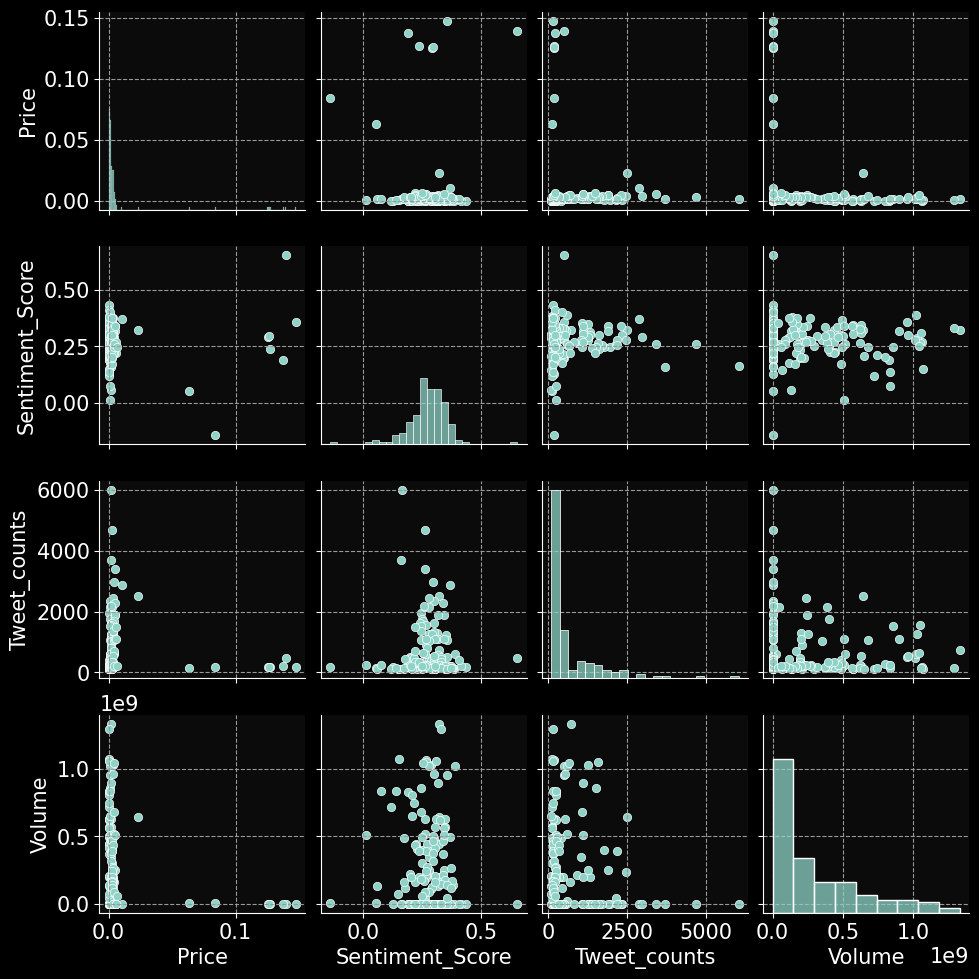

<Figure size 1000x1000 with 0 Axes>

In [166]:
import seaborn as sns
from IPython.display import Image
sns_plot = sns.pairplot(Final_data.iloc[0:150,:].drop('Indicator',axis=1))
sns_plot.savefig("pairplot.png")
mp.clf() # Clean parirplot figure from sns 
Image(filename='pairplot.png') # Show pairplot as image

Text(0.5, 0, 'Time')

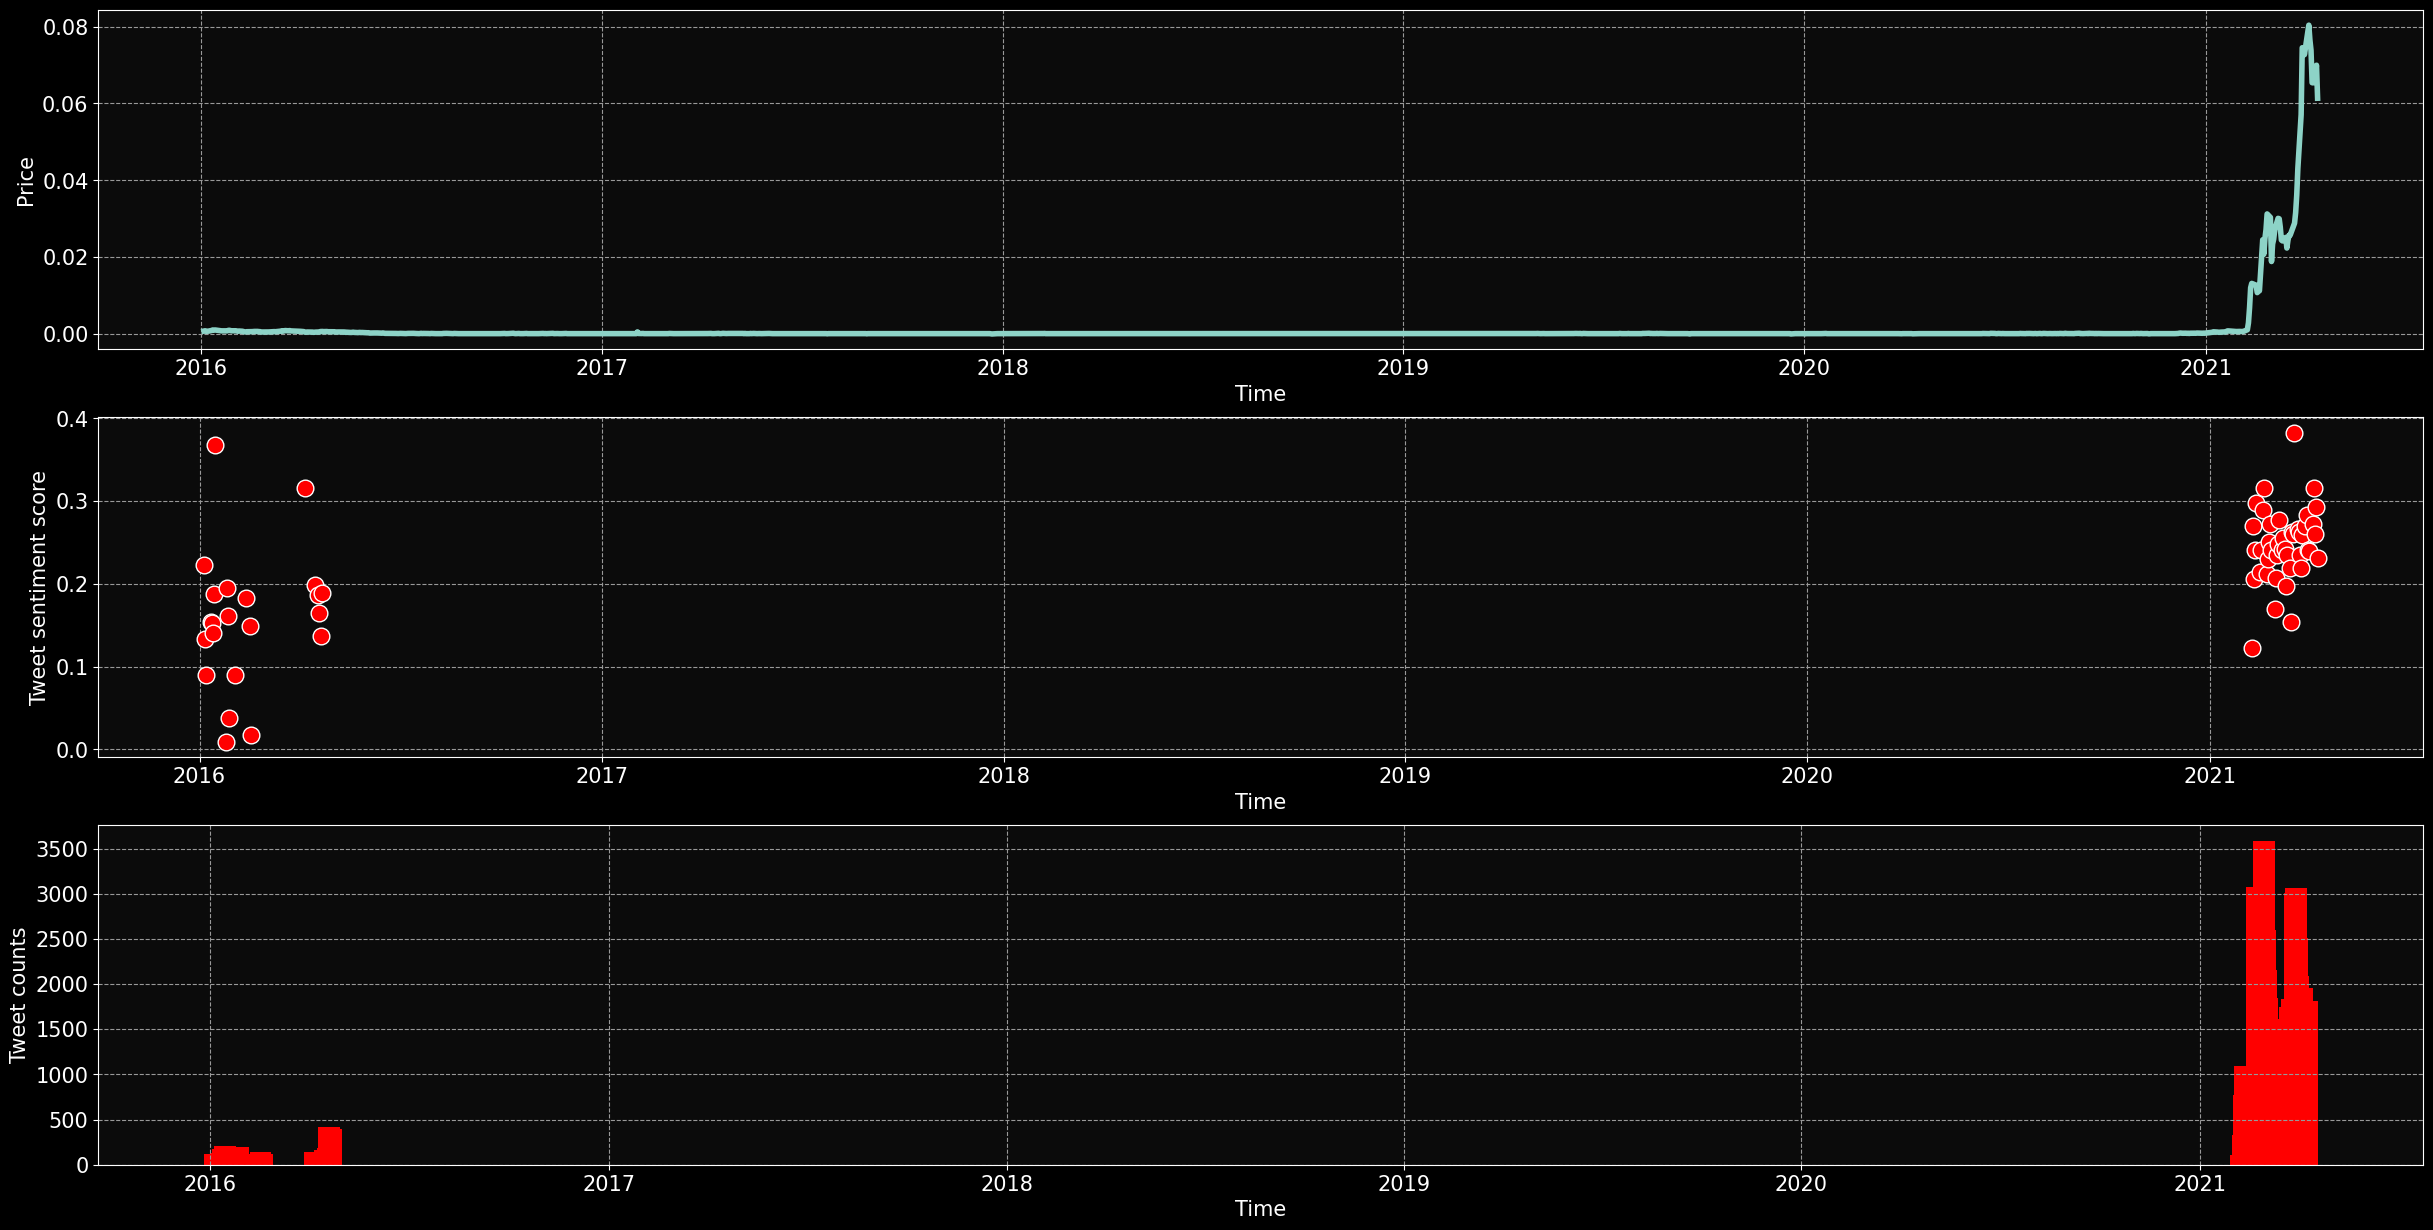

In [165]:
plot_LTNC = Final_data[Final_data.Ticker_name=='LTNC'].Sentiment_Score
bar_LTNC = Final_data[Final_data.Ticker_name=='LTNC'].Tweet_counts
fig,ax = mp.subplots(3,1,figsize=(30,15))
ax[1].plot(plot_LTNC.index, plot_LTNC.values,'o',color='red',markersize=12,markeredgecolor='white')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Tweet sentiment score')
ax[0].plot(df_daily_average.index, df_daily_average.LTNC,linewidth=4)
ax[0].set_ylabel('Price')
ax[0].set_xlabel('Time')
ax[2].bar(bar_LTNC.index,bar_LTNC.values,width=20,color='red',fontsize=20)
ax[2].set_ylabel('Tweet counts',fontsize=20)
ax[2].set_xlabel('Time',fontsize=20)